# DATA HARMONIZATION

In this script, we harmonize data from FA matrices, as it appears that the data may have been collected using different scanners (MSVIS subjects and FIS subjects). Using various scanners can potentially introduce increased variance in the results.

To verify if this issue exists, we will conduct a principal component analysis (PCA) to assess whether the data exhibits this problem. As we will observe, this issue only affects the FA matrices. To address this problem, we will utilize the Combat tool to eliminate this variation. After completing this process, we will save the data back in the folder as adjacency matrices.

## Import libraries, set folders names, import data...

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [2]:
folder_path = "data/"
FA_path = "FA_matrices_c/"
GM_path = "GM_matrices_c/"
fMRI_path = "fMRI_matrices_c/"

In the next we import names of nodes and we store them in a list, we will use them to label dataframe columns

In [3]:
names = pd.read_csv(folder_path + "mindboggle_ROIs.txt", sep = "\t" )
name_list = names.iloc[:, 0].tolist()

We import clinical data, though we only keep most relevant data

In [4]:
clinical_data = pd.read_csv(folder_path + "clinic.csv", index_col = 1)
cols_to_keep = ["age", "sex", "dd", "edss", "controls_ms"]
clinical_data = clinical_data[cols_to_keep]

We define a function to import data from folders, we import a dictionary of dataframes where keys are subjects id. Then we convert to a single dataframe where each row are the matrix connections (our matrices are all simmetricals), indices will be subjects id.

In [5]:
def load_data(matrices_path):
    # We obtain all files names and filter for csv
    all_files = os.listdir(folder_path + matrices_path)
    csv_files = [file for file in all_files if file.endswith('.csv')]
    
    # Depending on which matrices we import we have diferent "endnames"
    if matrices_path == FA_path:
        to_split ="_FA_factor_corrected.csv"
    elif matrices_path == GM_path:
        to_split = "_GM_matrix_corrected.csv"
    elif matrices_path == fMRI_path:
        to_split = "_r_matrix_corrected.csv"

    # Create a dictionary
    #### keys are subjects ids, obtained from splitting file name
    #### values are each dataframe
    #### column names are nodes names
    dfs = {file.split(to_split)[0]: pd.read_csv(os.path.join(folder_path, matrices_path,file), header = None, names = name_list) 
          for file in csv_files}
    
    # Set dataframes index as nodes names
    for key, df in dfs.items():
        df.index = name_list
    
    # Create a list to store the upper triangular elements as dictionaries
    upper_triangular_dicts = []

    # Iterate through the dictionary and extract the upper triangular elements
    for key, df in dfs.items():
        n = len(df)
        upper_triangular_data = {}

        for i in range(n):
            for j in range(i+1, n):  # j must be > i in order to iterate over upper diagonal, we skip diagonal
                row_name = df.index[i] 
                col_name = df.columns[j]
                combined_name = f"{row_name}/{col_name}" # Create columns name as combination of nodes, i.e. connection 
                value = df.iloc[i, j]
                upper_triangular_data[combined_name] = value # Add value to dictionary

    # Add the upper triangular dictionary to the list
        upper_triangular_dicts.append(upper_triangular_data)

    # Convert the list of dictionaries to a DataFrame
    result = pd.DataFrame(upper_triangular_dicts, index=dfs.keys())
    df_final =pd.concat([result, clinical_data], axis = 1) # Merge with clinical data
    
    return(df_final)

We retrieve data from folders and get our dataframe for each type of matrix

In [6]:
FA_df = load_data(FA_path)
GM_df = load_data(GM_path)
fMRI_df = load_data(fMRI_path)

In [7]:
FA_df

,ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiortemporal,ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,ctx-lh-caudalanteriorcingulate/ctx-lh-lateraloccipital,ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-lingual,...,ctx-rh-superiortemporal/ctx-rh-transversetemporal,ctx-rh-superiortemporal/ctx-rh-insula,ctx-rh-supramarginal/ctx-rh-transversetemporal,ctx-rh-supramarginal/ctx-rh-insula,ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
002MSVIS,0.422862,0.000000,0.0,0.0,0.374716,0.344459,0.502935,0.000000,0.383026,0.000000,...,0.354605,0.401124,0.383299,0.373590,0.366205,51.53,1,22.18,7.5,1
003MSVIS,0.360946,0.000000,0.0,0.0,0.346052,0.285988,0.467187,0.258432,0.376243,0.000000,...,0.330118,0.377220,0.358125,0.352559,0.360763,58.06,0,9.57,6.0,1
004MSVIS,0.452194,0.000000,0.0,0.0,0.390203,0.000000,0.504437,0.330954,0.408644,0.000000,...,0.322964,0.381072,0.390045,0.391322,0.372827,60.78,1,6.79,3.0,1
005MSVIS,0.395634,0.000000,0.0,0.0,0.405738,0.363048,0.488313,0.321842,0.339294,0.005412,...,0.354825,0.412469,0.450964,0.422590,0.392626,37.95,0,8.45,1.5,1
010MSVIS,0.381513,0.000000,0.0,0.0,0.385011,0.344250,0.462187,0.000000,0.390884,0.000000,...,0.300334,0.354225,0.380448,0.372597,0.362986,52.64,0,9.05,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sFIS_04,0.452681,0.000000,0.0,0.0,0.449661,0.000000,0.526144,0.000000,0.467365,0.019279,...,0.355053,0.386553,0.360238,0.415298,0.349212,32.98,1,-1.00,0.0,0
sFIS_05,0.460169,0.000000,0.0,0.0,0.511920,0.000000,0.521225,0.000000,0.484078,0.040960,...,0.386720,0.415633,0.442244,0.427336,0.402728,23.76,0,-1.00,0.0,0
sFIS_06,0.451803,0.000000,0.0,0.0,0.026518,0.000000,0.548603,0.000000,0.517000,0.040083,...,0.431197,0.427488,0.460184,0.442048,0.421279,24.11,0,-1.00,0.0,0
sFIS_07,0.493917,0.479725,0.0,0.0,0.517633,0.000000,0.549720,0.000000,0.041474,0.040408,...,0.405235,0.424794,0.401061,0.419834,0.372392,23.98,0,-1.00,0.0,0


In [8]:
GM_df

,ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiortemporal,ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,ctx-lh-caudalanteriorcingulate/ctx-lh-lateraloccipital,ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-lingual,...,ctx-rh-superiortemporal/ctx-rh-transversetemporal,ctx-rh-superiortemporal/ctx-rh-insula,ctx-rh-supramarginal/ctx-rh-transversetemporal,ctx-rh-supramarginal/ctx-rh-insula,ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
002MSVIS,0.010929,0.009760,0.004095,0.016247,0.019892,0.024381,0.003295,0.024421,0.016067,0.019786,...,0.061787,0.203248,0.034667,0.113542,0.032889,51.53,1,22.18,7.5,1
003MSVIS,0.011814,0.007011,0.003160,0.016068,0.020751,0.021063,0.005303,0.026402,0.014785,0.019581,...,0.061166,0.209146,0.046808,0.160669,0.031930,58.06,0,9.57,6.0,1
004MSVIS,0.019772,0.016858,0.008906,0.027713,0.039143,0.046281,0.010752,0.053442,0.029088,0.037509,...,0.085213,0.255054,0.062418,0.185692,0.040021,60.78,1,6.79,3.0,1
005MSVIS,0.019072,0.015240,0.006077,0.027081,0.037567,0.039069,0.011061,0.038863,0.025328,0.031065,...,0.084887,0.288730,0.054658,0.186935,0.046690,37.95,0,8.45,1.5,1
010MSVIS,0.019195,0.010714,0.006002,0.023047,0.031131,0.034148,0.008002,0.040881,0.022804,0.030472,...,0.070454,0.231535,0.051688,0.169564,0.038556,52.64,0,9.05,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sFIS_04,0.016405,0.012228,0.005499,0.025840,0.030350,0.031690,0.007030,0.031651,0.022012,0.026534,...,0.081746,0.245932,0.062939,0.186979,0.047140,32.98,1,-1.00,0.0,0
sFIS_05,0.012670,0.008487,0.003625,0.016767,0.022393,0.024754,0.004905,0.028177,0.018388,0.018760,...,0.055416,0.186306,0.041607,0.141008,0.029754,23.76,0,-1.00,0.0,0
sFIS_06,0.012756,0.012174,0.005678,0.024117,0.029642,0.032040,0.006351,0.040994,0.024445,0.025164,...,0.084969,0.249238,0.056782,0.168060,0.046933,24.11,0,-1.00,0.0,0
sFIS_07,0.012832,0.011736,0.006306,0.022974,0.032552,0.032134,0.007930,0.037151,0.018913,0.024618,...,0.084674,0.261406,0.056019,0.172398,0.044755,23.98,0,-1.00,0.0,0


In [9]:
fMRI_df

,ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiortemporal,ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,ctx-lh-caudalanteriorcingulate/ctx-lh-lateraloccipital,ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-lingual,...,ctx-rh-superiortemporal/ctx-rh-transversetemporal,ctx-rh-superiortemporal/ctx-rh-insula,ctx-rh-supramarginal/ctx-rh-transversetemporal,ctx-rh-supramarginal/ctx-rh-insula,ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
002MSVIS,0.323966,0.280882,0.102555,0.000000,0.183752,0.303809,0.000000,0.269585,0.284821,0.043648,...,0.426030,0.471652,0.304220,0.550451,0.608276,51.53,1,22.18,7.5,1
003MSVIS,0.004214,0.172493,0.038319,0.157708,0.183477,0.112828,0.024623,0.161768,0.186286,0.223668,...,0.523544,0.667273,0.381991,0.190694,0.368149,58.06,0,9.57,6.0,1
004MSVIS,0.690146,0.217202,0.508661,0.506403,0.240202,0.345948,0.472031,0.262582,0.328863,0.603125,...,0.008670,0.346880,0.261818,0.489867,0.601260,60.78,1,6.79,3.0,1
005MSVIS,0.412052,0.202844,0.333588,0.023163,0.335791,0.464558,0.117851,0.368819,0.383471,0.138349,...,0.565336,0.823688,0.268090,0.604084,0.749515,37.95,0,8.45,1.5,1
010MSVIS,0.077615,0.047773,0.119387,0.204930,0.079536,0.453488,0.363171,0.098913,0.000000,0.024340,...,0.504794,0.703537,0.194900,0.407123,0.533172,52.64,0,9.05,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sFIS_04,0.105243,0.023922,0.126358,0.065068,0.251708,0.266299,0.058992,0.185796,0.053963,0.193027,...,0.529780,0.389884,0.096719,0.271446,0.347091,32.98,1,-1.00,0.0,0
sFIS_05,0.090557,0.010974,0.085604,0.103773,0.434759,0.359727,0.336898,0.147321,0.038856,0.108319,...,0.323430,0.494677,0.190700,0.659076,0.689144,23.76,0,-1.00,0.0,0
sFIS_06,0.745600,0.477061,0.358297,0.075028,0.722121,0.331399,0.324095,0.065991,0.451636,0.495903,...,0.139316,0.322764,0.061263,0.146439,0.598410,24.11,0,-1.00,0.0,0
sFIS_07,0.392514,0.475284,0.175295,0.681111,0.384868,0.652504,0.012443,0.743265,0.000000,0.670935,...,0.600568,0.315848,0.102777,0.173250,0.556335,23.98,0,-1.00,0.0,0


## PCA

First we obtain a list to identify which scanner were used and we plot the results for each matrix, excluding from data, clinical variables.

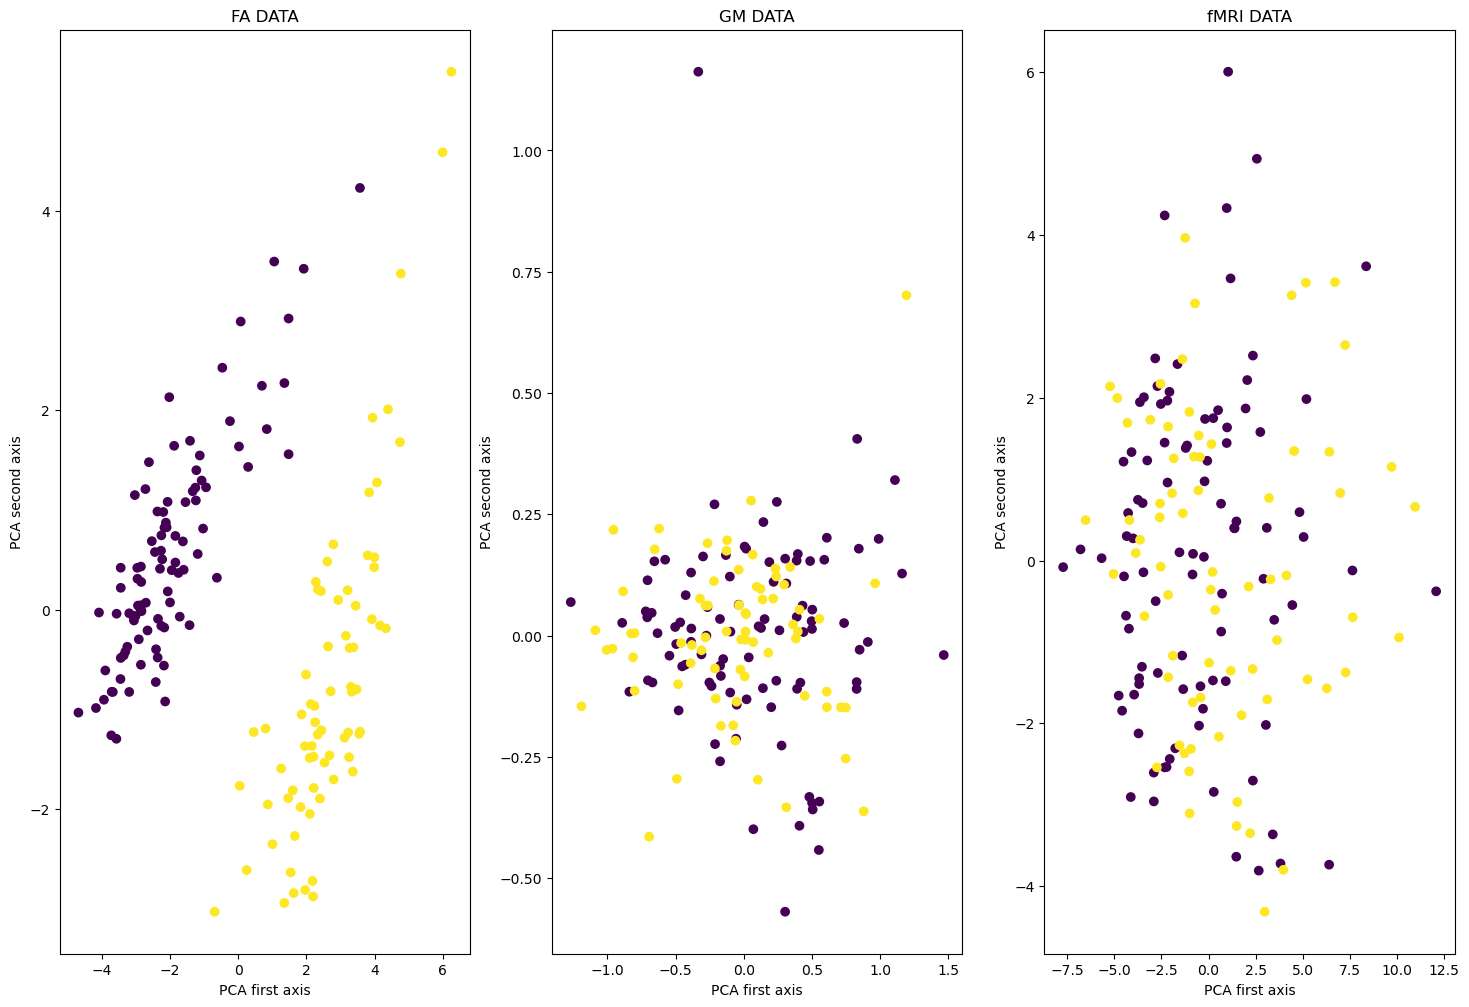

In [11]:
scanner = [0 if "MSVIS" in name else 1 for name in FA_df.index] # Creat a list for the scanner

plt.figure(figsize=(18, 12))

ax = plt.subplot(1,3,1)
plt.title("FA DATA")
plt.xlabel('PCA first axis')
plt.ylabel('PCA second axis') 

pca_variables = FA_df.iloc[:, :-5]
pca = PCA(n_components=2)
pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)

plt.scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])


ax = plt.subplot(1,3,2)
plt.title("GM DATA")
plt.xlabel('PCA first axis')
plt.ylabel('PCA second axis') 

pca_variables = GM_df.iloc[:, :-5]
pca = PCA(n_components=2)
pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)

plt.scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

ax = plt.subplot(1,3,3)
plt.title("fMRI DATA")
plt.xlabel('PCA first axis')
plt.ylabel('PCA second axis') 

pca_variables = fMRI_df.iloc[:, :-5]
pca = PCA(n_components=2)
pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)

plt.scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])



As we stated in the introduction only FA Matrices show bias of acquisition

## HARMONIZATION WITH COMBAT

We just follow steps from library github.
[LINK](https://github.com/Jfortin1/neuroCombat)

In [12]:
# First we need and array from our dataframe

array = FA_df.iloc[:, :-5].to_numpy().T
array.shape # Just check if shape is correct

(2850, 165)

In [13]:
# We define our covariables

covars = FA_df[["controls_ms"]]
covars['scanner']= scanner

C:\Users\joang\AppData\Local\Temp\ipykernel_2816\136667336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covars['scanner']= scanner


In [14]:
# We must define categorical variables within covars
categorical_cols = ["controls_ms"]

In [15]:
from neuroCombat import neuroCombat

In [16]:
data_combat = neuroCombat(dat = array, covars = covars,  batch_col= "scanner")["data"]

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


C:\Users\joang\anaconda3\lib\site-packages\neuroCombat\neuroCombat.py:324: RuntimeWarning: divide by zero encountered in divide
  change = max((abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max())


In [17]:
#Check number of cols of our dataframe
col_names = list(FA_df.columns)
col_names = col_names[: -5]
len(col_names)

2850

In [18]:
FA_harm =pd.DataFrame(data_combat.T, index = FA_df.index, columns = col_names )

Text(0.5, 1.0, 'FA DATA')

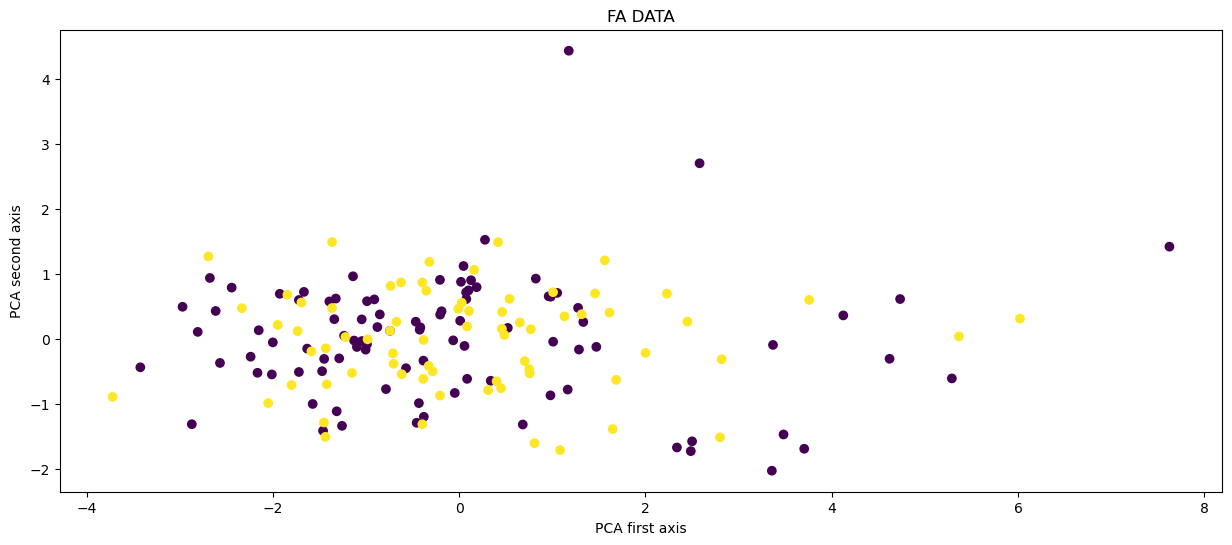

In [19]:
plt.figure(figsize=(15, 6))

pca_variables = FA_harm
pca = PCA(n_components=2)
pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)

plt.scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

plt.xlabel('PCA first axis')
plt.ylabel('PCA second axis') 
plt.title("FA DATA")


Remove values below 0.1

In [20]:
FA_harm[FA_harm < 0.1] = 0


## BACK TO MATRIX

In R, we require data in a matrix format to generate graphs from adjacency matrices. Therefore, we convert the single dataframe into a dictionary of dataframes, with one dataframe for each subject. Afterward, we save the data as CSV files.

In [21]:
#We define a function to get a matrix from the dataframe

def dataframe_to_dict(df, n):
    result = {}
    for index, row in df.iterrows(): # Iterate over rows in df
        matrix = np.zeros((n, n)) # create a matrix for each row, as diagonal is filled with zeros is already filled
        
        k = 0 # start at the beginning of the row
        # Iterate over upper diagonal 
        for i in range(n):
            for j in range(i+1, n):
                matrix[i, j] = row[k]
                matrix[j, i] = row[k]
                k += 1
        # We are not going to store names as in the other matrices we do not have names. We will add them later
        result[index] = pd.DataFrame(matrix, columns=range(n), index=range(n)) 
    return result

new_FA_matrices = dataframe_to_dict(FA_harm, 76)

In [22]:
new_FA_folder = "FA_matrices_harm/"
complete_folder = os.path.join(folder_path, new_FA_folder)
if not os.path.exists(complete_folder):
    os.makedirs(complete_folder)

In [23]:
prefix = "_FA_factor_corrected.csv"

for key, df in new_FA_matrices.items():
    file_name = f"{complete_folder}{key}{prefix}"
    df.to_csv(file_name, header = False, index = False)